In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables = pd.read_html(url)

print(f"Знайдено {len(tables)} таблиць.")

for i, table in enumerate(tables):
    print(f"Таблиця {i}")
    print(table.head())
    print("\n")


Знайдено 71 таблиць.
Таблиця 0
                                   Населення України  \
0  Статево-вікова піраміда населення України на 1...   
1                                        Чисельність   
2                                            Густота   
3                                Коефіцієнт міграції   
4                                      Природний рух   

                                 Населення України.1  
0  Статево-вікова піраміда населення України на 1...  
1                   ▼ 40,96 млн (1 лютого 2022) осіб  
2                                   ▼ 68,2 особи/км²  
3                                             ▲0,9 ‰  
4                                      Природний рух  


Таблиця 1
    0                                                  1
0 NaN  На цьому місці має відображатися графік чи діа...


Таблиця 2
    0                                                  1
0 NaN  На цьому місці має відображатися графік чи діа...


Таблиця 3
    0                                 

In [ ]:
df = tables[12]

In [ ]:
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [ ]:
print(f"Shape: {df.shape}")

Shape: (28, 9)


In [ ]:
df.replace("—", np.nan, inplace=True)

In [ ]:
print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [ ]:
df.replace("—", np.nan, inplace=True)

df.replace({r'~': '', r',': '.'}, regex=True, inplace=True)

df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

In [ ]:
print(df.isnull().mean())

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [ ]:
df.drop(index=df.index[-1], inplace=True)

In [ ]:
# Заповнюємо пропуски в колонках "2014" і "2019" середніми значеннями
df['2014'] = pd.to_numeric(df['2014'], errors='coerce')  # Перетворюємо на числовий формат
df['2019'] = pd.to_numeric(df['2019'], errors='coerce')  # Перетворюємо на числовий формат

# Заповнюємо пропуски середніми значеннями
df['2014'].fillna(df['2014'].mean(), inplace=True)
df['2019'].fillna(df['2019'].mean(), inplace=True)
# Перевіряємо, чи всі пропуски заповнені
print(df.isnull().sum())


Регіон    0
1950      0
1960      0
1970      0
1990      0
2000      0
2012      0
2014      0
2019      0
dtype: int64


In [ ]:
average_birth_rate_2019 = df['2019'].mean()

In [ ]:
regions_above_average_2019 = df[df['2019'] > average_birth_rate_2019]['Регіон']
print("Регіони з народжуваністю вище середньої у 2019 році:")
print(regions_above_average_2019)

Регіони з народжуваністю вище середньої у 2019 році:
2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


In [ ]:
max_birth_rate_2014_region = df.loc[df['2014'].idxmax(), 'Регіон']
print(f"Регіон з найвищою народжуваністю у 2014 році: {max_birth_rate_2014_region}")

Регіон з найвищою народжуваністю у 2014 році: Рівненська


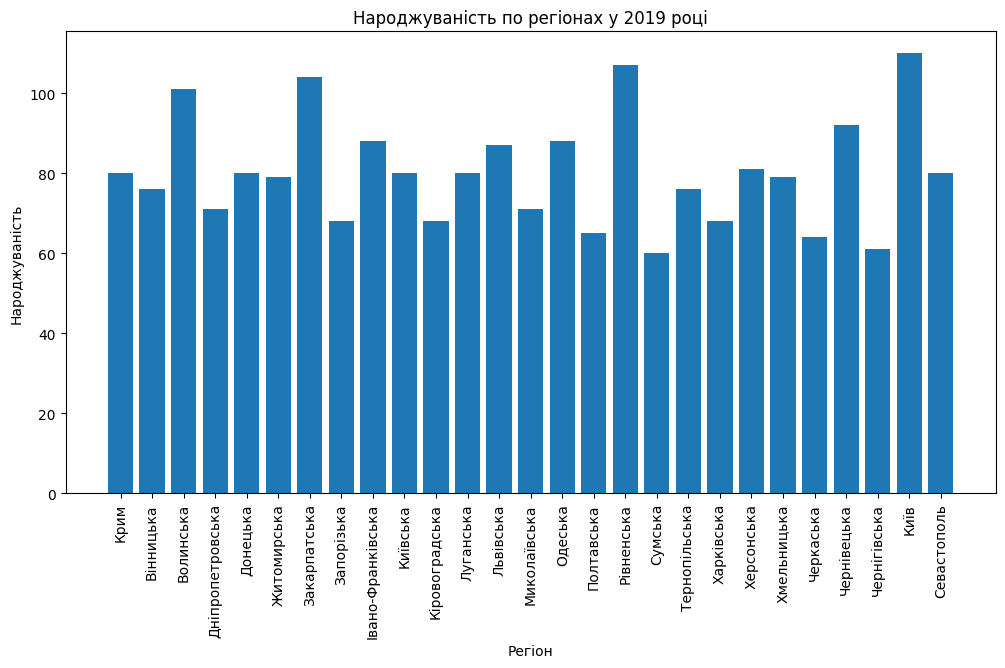

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df['Регіон'], df['2019'])
plt.xticks(rotation=90)
plt.title('Народжуваність по регіонах у 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність')
plt.show()

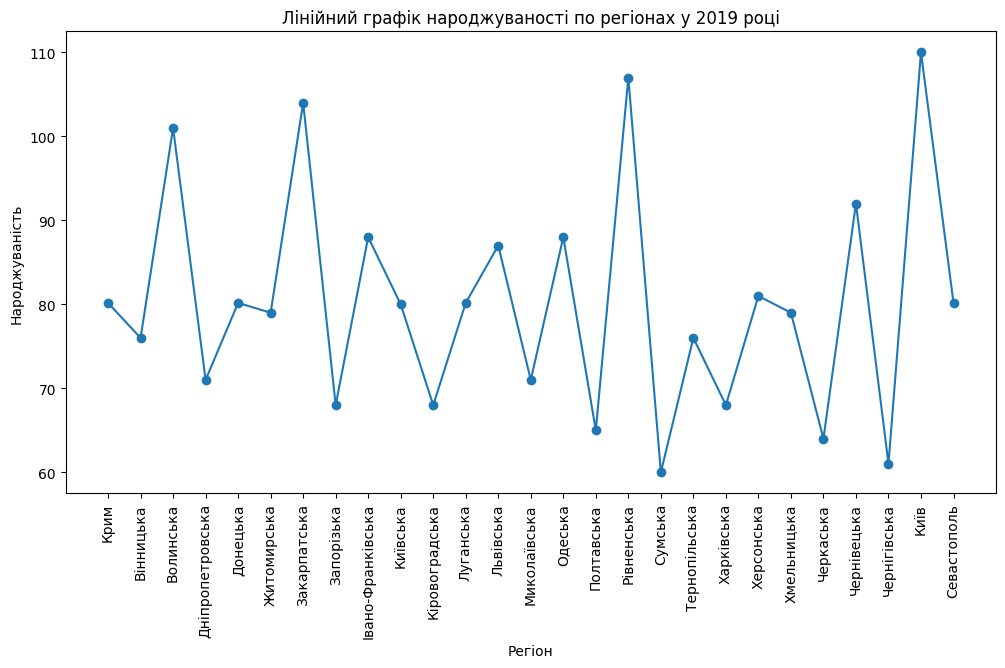

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Регіон'], df['2019'], marker='o')
plt.xticks(rotation=90)
plt.title('Лінійний графік народжуваності по регіонах у 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність')
plt.show()

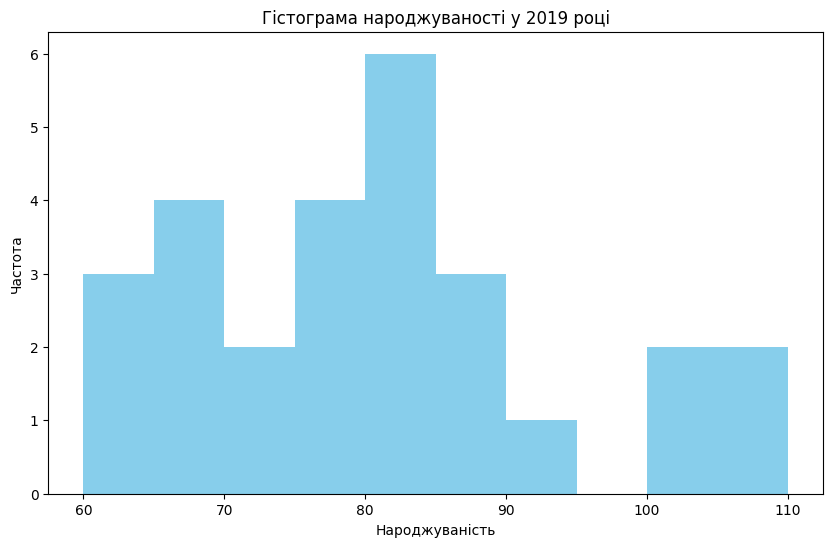

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['2019'], bins=10, color='skyblue')
plt.title('Гістограма народжуваності у 2019 році')
plt.xlabel('Народжуваність')
plt.ylabel('Частота')
plt.show()

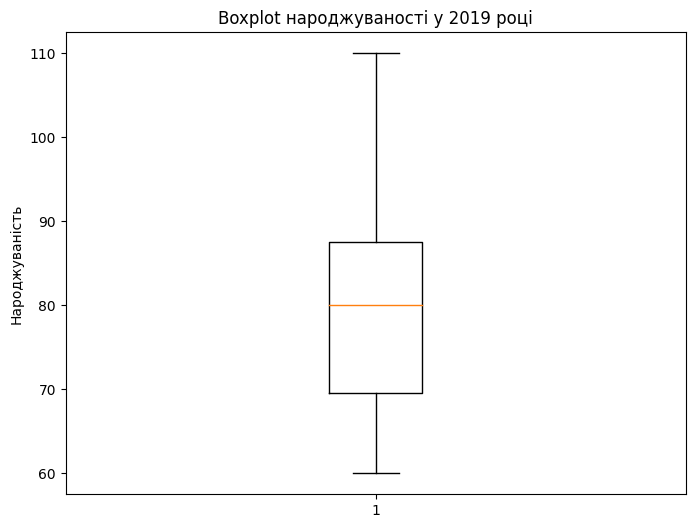

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['2019'])
plt.title('Boxplot народжуваності у 2019 році')
plt.ylabel('Народжуваність')
plt.show()